<a href="https://colab.research.google.com/github/Macklane2000/telecomX2-jddc/blob/main/TelecomX2Juan_Diaz_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Preparación de los datos**

In [1]:
import pandas as pd

In [2]:
datos = pd.read_csv('/content/datos_tratados.csv')

In [3]:
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Churn_numeric,numServicios
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,0,5
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,0,4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,1,3
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,1,6
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,1,4


##**Eliminacion de columnas irrelevantes**

In [4]:
# Eliminar columnas que no son necesarias para el análisis o modelos predictivos
# 'customerID' es un identificador único y no aporta información para la predicción.
# 'Churn' es la variable objetivo original en formato de texto, ya tenemos 'Churn_numeric'.
datos = datos.drop(['customerID', 'Churn'], axis=1)

# Mostrar las primeras filas del DataFrame modificado para verificar los cambios
datos.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Churn_numeric,numServicios
0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,0,5
1,Male,0,No,No,9,Yes,Yes,DSL,No,No,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,0,4
2,Male,0,No,No,4,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,1,3
3,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,1,6
4,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,1,4


##**Encoding**

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

In [5]:
# Identificar columnas categóricas (excluyendo la variable objetivo 'Churn_numeric' y las numéricas)
# Se seleccionan las columnas de tipo 'object' que suelen ser las categóricas en este dataset.
columnas_categoricas = datos.select_dtypes(include=['object']).columns

# Aplicar One-Hot Encoding a las columnas categóricas
# Se utiliza pd.get_dummies para convertir las variables categóricas en variables dummy/indicadoras.
# 'drop_first=True' se usa para evitar la multicolinealidad, eliminando una de las categorías resultantes por cada columna original.
datos_encoded = pd.get_dummies(datos, columns=columnas_categoricas, drop_first=True)

# Mostrar las primeras filas del DataFrame codificado para verificar los cambios
datos_encoded.head()

# Mostrar las dimensiones del nuevo DataFrame para ver cuántas columnas nuevas se crearon
print(f"Dimensiones del DataFrame original: {datos.shape}")
print(f"Dimensiones del DataFrame codificado: {datos_encoded.shape}")

Dimensiones del DataFrame original: (7256, 21)
Dimensiones del DataFrame codificado: (7256, 32)


##**Verificación de la proporción de cancelación (Churm)**

Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

In [6]:
# Calcular la proporción de cada clase en la columna 'Churn_numeric'
# La columna 'Churn_numeric' contiene 1 para los clientes que cancelaron y 0 para los que no.
proporcion_clases = datos_encoded['Churn_numeric'].value_counts(normalize=True)

# Mostrar la proporción de clientes para cada clase (0: No Churn, 1: Churn)
# normalize=True muestra las proporciones en lugar de los conteos absolutos.
print("Proporción de clientes por clase (0: No Churn, 1: Churn):")
print(proporcion_clases)

# Evaluar si existe un desbalance significativo
# Un desbalance se considera significativo si la proporción de la clase minoritaria es mucho menor que la de la mayoritaria (por ejemplo, menos del 20-30%).
# En este caso, si la proporción de la clase '1' (Churn) es mucho menor que la de '0' (No Churn), hay desbalance.
print("\nEvaluación de desbalance de clases:")
if proporcion_clases[1] < 0.30: # Umbral común para considerar desbalance
    print("Existe un desbalance significativo entre las clases.")
    print("La clase minoritaria (Churn) representa aproximadamente el {:.2f}% del total.".format(proporcion_clases[1] * 100))
    print("Esto puede requerir técnicas de manejo de desbalance (ej. sobremuestreo, submuestreo, SMOTE) si se construye un modelo predictivo.")
else:
    print("No parece existir un desbalance significativo entre las clases.")

Proporción de clientes por clase (0: No Churn, 1: Churn):
Churn_numeric
0    0.74242
1    0.25758
Name: proportion, dtype: float64

Evaluación de desbalance de clases:
Existe un desbalance significativo entre las clases.
La clase minoritaria (Churn) representa aproximadamente el 25.76% del total.
Esto puede requerir técnicas de manejo de desbalance (ej. sobremuestreo, submuestreo, SMOTE) si se construye un modelo predictivo.


##**Balanceo de clases (Opcional)**

Aplica técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.

### Instalar librerías

Instalar las librerías necesarias, como `imblearn` para técnicas de balanceo.


In [7]:
%pip install imblearn

### Separar características y variable objetivo


Dividir el DataFrame `datos_encoded` en las características (X) y la variable objetivo (y).


In [8]:
# Crear la variable X con todas las columnas excepto 'Churn_numeric'
# Se eliminan la columna 'Churn_numeric' del DataFrame para obtener las características.
X = datos_encoded.drop('Churn_numeric', axis=1)

# Crear la variable y con la columna 'Churn_numeric'
# Se selecciona únicamente la columna 'Churn_numeric' como variable objetivo.
y = datos_encoded['Churn_numeric']

# Mostrar las primeras filas de X para verificar
# Se utiliza display para mostrar las primeras filas del DataFrame X (características).
print("Primeras filas de X (Características):")
X.head()

# Mostrar las primeras filas de y para verificar
print("\nPrimeras filas de y (Variable Objetivo):")
y.head()

Primeras filas de X (Características):

Primeras filas de y (Variable Objetivo):


,Churn_numeric
0,0
1,0
2,1
3,1
4,1


### Aplicar técnica de balanceo

Aplicar una técnica como SMOTE para balancear las clases en los datos.


In [9]:
# Importa la clase SMOTE desde imblearn.over_sampling
# Esta clase se utiliza para aplicar la técnica de sobremuestreo SMOTE.
from imblearn.over_sampling import SMOTE

# Instancia un objeto SMOTE
# Se crea una instancia de SMOTE con los parámetros por defecto.
smote = SMOTE()

# Aplica SMOTE a tus datos de características (X) y variable objetivo (y)
# El método fit_resample() aplica SMOTE a los datos de entrenamiento para generar muestras sintéticas de la clase minoritaria.
X_resampled, y_resampled = smote.fit_resample(X, y)

# Mostrar las dimensiones de los datos después del balanceo para verificar
# Se imprimen las formas de los DataFrames y Series resultantes para confirmar que las dimensiones han cambiado.
print(f"Dimensiones de X después de SMOTE: {X_resampled.shape}")
print(f"Dimensiones de y después de SMOTE: {y_resampled.shape}")

# Mostrar la proporción de clases en los datos balanceados para verificar
# Se calcula y muestra la proporción de cada clase en la variable objetivo balanceada para confirmar que están igualadas.
print("\nProporción de clases después de SMOTE:")
print(y_resampled.value_counts(normalize=True))

Dimensiones de X después de SMOTE: (10774, 31)
Dimensiones de y después de SMOTE: (10774,)

Proporción de clases después de SMOTE:
Churn_numeric
0    0.5
1    0.5
Name: proportion, dtype: float64


### Verificar el balanceo


Verificar que las clases están balanceadas después de aplicar la técnica SMOTE.


In [10]:
# Calcular la proporción de cada clase en la variable objetivo balanceada y_resampled
# Se utiliza value_counts(normalize=True) para obtener las proporciones de las clases 0 y 1 en la variable y_resampled.
proporcion_clases_balanceadas = y_resampled.value_counts(normalize=True)

# Imprimir la proporción de clases balanceadas
# Se imprime el resultado para mostrar que las clases ahora tienen proporciones iguales o muy cercanas a 0.5.
print("Proporción de clases después del balanceo con SMOTE:")
print(proporcion_clases_balanceadas)

Proporción de clases después del balanceo con SMOTE:
Churn_numeric
0    0.5
1    0.5
Name: proportion, dtype: float64


### Dividir datos (si no se hizo antes)


Dividir los datos balanceados (`X_resampled`, `y_resampled`) en conjuntos de entrenamiento y prueba.


In [11]:
# Importa la función train_test_split desde sklearn.model_selection
# Esta función se utiliza para dividir los arrays o matrices en subconjuntos aleatorios de entrenamiento y prueba.
from sklearn.model_selection import train_test_split

# Divide los datos balanceados en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
# X_resampled son las características balanceadas y y_resampled es la variable objetivo balanceada.
# test_size=0.20 especifica que el 20% de los datos se usará para el conjunto de prueba.
# random_state=42 asegura que la división sea la misma cada vez que se ejecuta el código, para reproducibilidad.
# stratify=y_resampled asegura que la proporción de clases en y_resampled se mantenga en los conjuntos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=42, stratify=y_resampled)

# Imprime las dimensiones de los conjuntos de entrenamiento y prueba para verificar la división
# Se imprimen las formas (número de filas y columnas) de cada conjunto para confirmar que la división se realizó correctamente.
print("Dimensiones del conjunto de entrenamiento de características (X_train):", X_train.shape)
print("Dimensiones del conjunto de prueba de características (X_test):", X_test.shape)
print("Dimensiones del conjunto de entrenamiento de la variable objetivo (y_train):", y_train.shape)
print("Dimensiones del conjunto de prueba de la variable objetivo (y_test):", y_test.shape)

Dimensiones del conjunto de entrenamiento de características (X_train): (8619, 31)
Dimensiones del conjunto de prueba de características (X_test): (2155, 31)
Dimensiones del conjunto de entrenamiento de la variable objetivo (y_train): (8619,)
Dimensiones del conjunto de prueba de la variable objetivo (y_test): (2155,)


##**Normalización o Estandarización (Si es necesario)**

Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos. Realiza comentarios en español de cada una de las lineas de código para entender su funcionamiento

## **Respuesta:**

Evaluar la necesidad de normalizar o estandarizar los datos es un paso importante y depende del tipo de algoritmo de Machine Learning que planees utilizar.


* **Modelos basados en distancia:**

Algoritmos como K-Nearest Neighbors (KNN), Support Vector Machines (SVM), Regresión Logística y Redes Neuronales calculan distancias entre los puntos de datos. Si las características tienen escalas muy diferentes, las características con rangos de valores más grandes pueden dominar el cálculo de la distancia, afectando el rendimiento del modelo. La normalización o estandarización asegura que todas las características contribuyan de manera equitativa a la distancia.


* **Modelos basados en árboles:**


Algoritmos como Árboles de Decisión, Random Forest y XGBoost dividen los datos basándose en umbrales en las características. La escala de los datos no afecta la determinación de estos umbrales ni la estructura del árbol. Por lo tanto, estos modelos no requieren normalización o estandarización.


Si se planea usar modelos como KNN, SVM, Regresión Logística o Redes Neuronales, es recomendable normalizar o estandarizar tus datos.
Si se planea usar modelos basados en árboles como Decision Tree, Random Forest o XGBoost, no es necesario normalizar o estandarizar tus datos.


Para realizar la normalización o estandarización, se podria usar clases de sklearn.preprocessing como StandardScaler (estandarización, que centra los datos en 0 con desviación estándar 1) o MinMaxScaler (normalización, que escala los datos a un rango específico, generalmente entre 0 y 1).


#**Correlación y selección de variables**

## **Análisis de Correlación**

Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

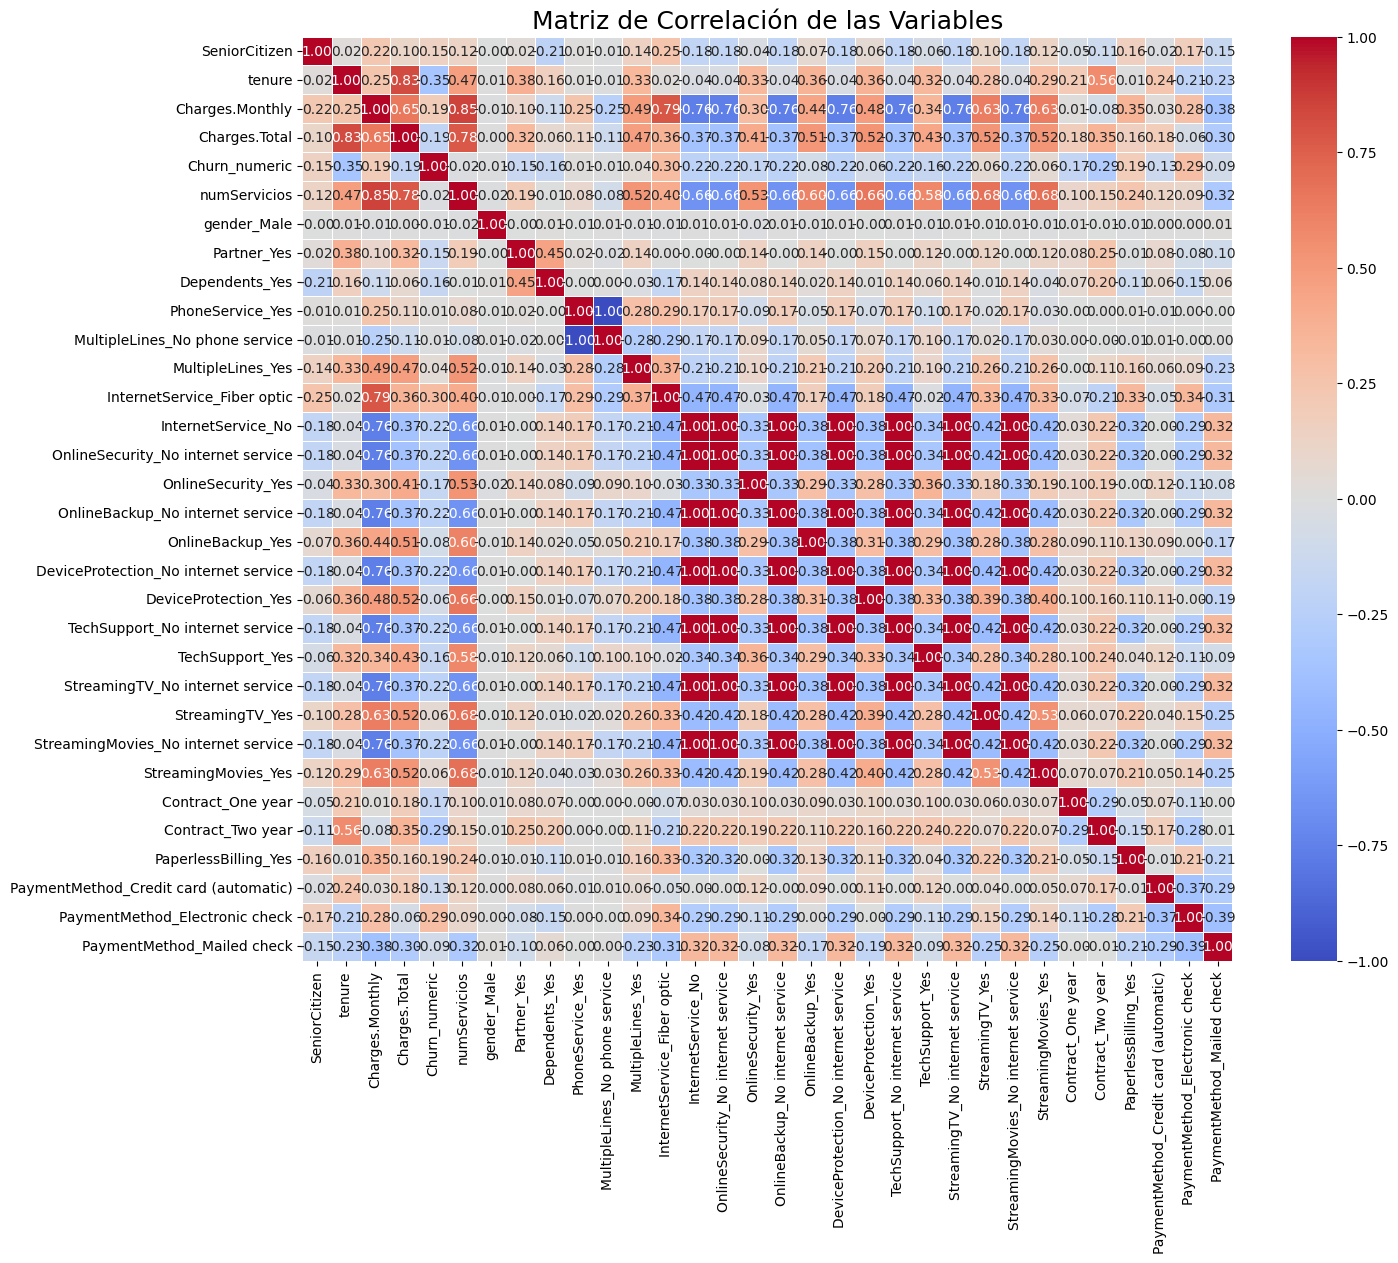


Correlación de las variables con 'Churn_numeric' (ordenada):
Churn_numeric                            1.000000
InternetService_Fiber optic              0.300416
PaymentMethod_Electronic check           0.294181
Charges.Monthly                          0.189393
PaperlessBilling_Yes                     0.186309
SeniorCitizen                            0.146400
StreamingTV_Yes                          0.062456
StreamingMovies_Yes                      0.060092
MultipleLines_Yes                        0.039277
PhoneService_Yes                         0.012337
gender_Male                             -0.009494
MultipleLines_No phone service          -0.012337
numServicios                            -0.017924
DeviceProtection_Yes                    -0.063479
OnlineBackup_Yes                        -0.080211
PaymentMethod_Mailed check              -0.089198
PaymentMethod_Credit card (automatic)   -0.131448
Partner_Yes                             -0.148106
Dependents_Yes                        

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación de todas las columnas numéricas en el DataFrame codificado
# Se utiliza el método .corr() en el DataFrame datos_encoded para calcular la correlación entre todas las pares de columnas.
matriz_correlacion = datos_encoded.corr()

# Visualizar la matriz de correlación utilizando un mapa de calor (heatmap)
# sns.heatmap crea un mapa de calor.
# matriz_correlacion es la matriz de datos que se visualiza.
# annot=True muestra los valores de correlación en las celdas del mapa de calor.
# cmap='coolwarm' define el esquema de color, donde los colores fríos representan correlaciones negativas y los cálidos, positivas.
# fmt=".2f" formatea los números mostrados en las celdas con dos decimales.
plt.figure(figsize=(15, 12)) # Ajusta el tamaño de la figura para una mejor visualización
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Añadir título al gráfico
# Se establece el título del mapa de calor para describir su contenido.
plt.title('Matriz de Correlación de las Variables', fontsize=18)

# Mostrar el gráfico
# Se muestra la figura generada con el mapa de calor.
plt.show()

# Opcional: Mostrar las correlaciones con la variable objetivo 'Churn_numeric' ordenadas
# Se selecciona la columna 'Churn_numeric' de la matriz de correlación.
# .sort_values(ascending=False) ordena los valores de correlación de forma descendente.
print("\nCorrelación de las variables con 'Churn_numeric' (ordenada):")
print(matriz_correlacion['Churn_numeric'].sort_values(ascending=False))

##**Análisis dirigido**

Investiga como variables específicas se relacionan con la cancelación, tales como:

* Tiempo de contrato × Cancelación

* Gasto total × Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

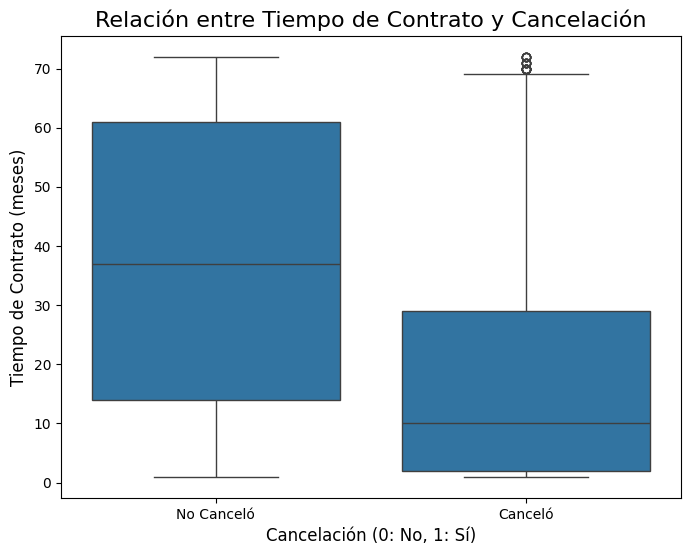

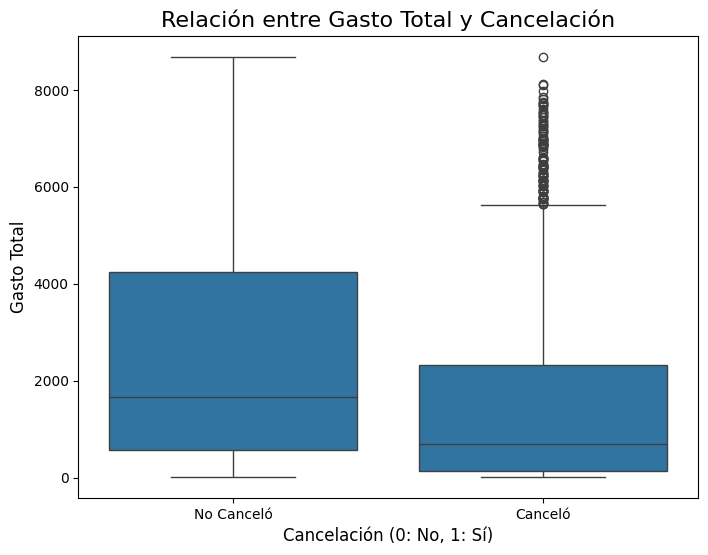

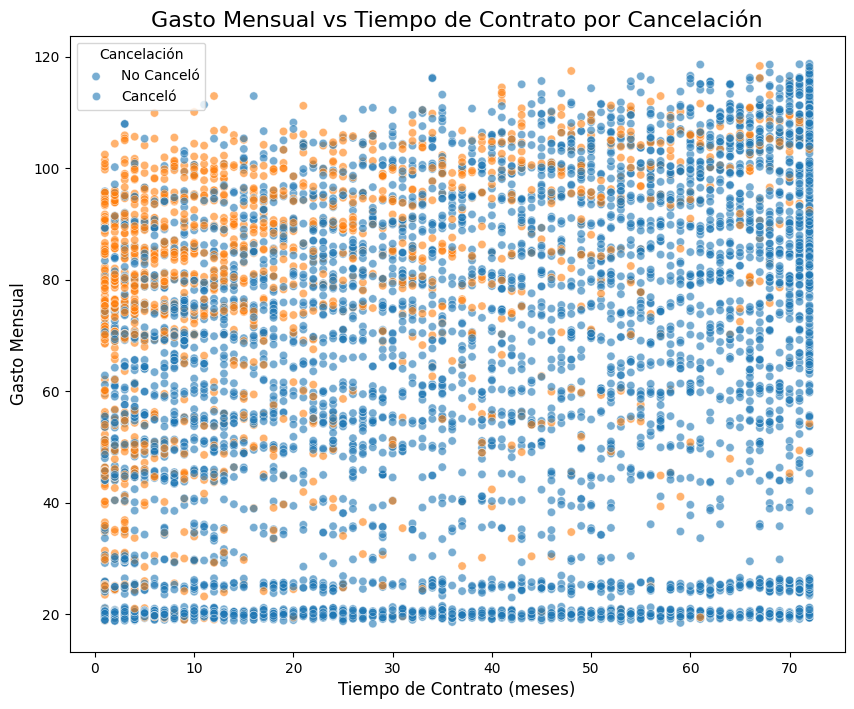

In [13]:
# Visualizar la relación entre 'tenure' (Tiempo de contrato) y 'Churn_numeric' (Cancelación)
# Se utiliza un boxplot para comparar la distribución del tiempo de contrato para cada clase de cancelación (0: No Churn, 1: Churn).
# El eje x es la variable objetivo 'Churn_numeric', y el eje y es 'tenure'.
# data=datos_encoded especifica el DataFrame a utilizar.
plt.figure(figsize=(8, 6)) # Ajusta el tamaño de la figura.
sns.boxplot(x='Churn_numeric', y='tenure', data=datos_encoded)
plt.title('Relación entre Tiempo de Contrato y Cancelación', fontsize=16) # Título del gráfico.
plt.xlabel('Cancelación (0: No, 1: Sí)', fontsize=12) # Etiqueta del eje x.
plt.ylabel('Tiempo de Contrato (meses)', fontsize=12) # Etiqueta del eje y.
plt.xticks([0, 1], ['No Canceló', 'Canceló']) # Cambia las etiquetas del eje x por texto más descriptivo.
plt.show() # Muestra el gráfico.

# Visualizar la relación entre 'Charges.Total' (Gasto total) y 'Churn_numeric' (Cancelación)
# Se utiliza un boxplot para comparar la distribución del gasto total para cada clase de cancelación.
# El eje x es la variable objetivo 'Churn_numeric', y el eje y es 'Charges.Total'.
# data=datos_encoded especifica el DataFrame a utilizar.
plt.figure(figsize=(8, 6)) # Ajusta el tamaño de la figura.
sns.boxplot(x='Churn_numeric', y='Charges.Total', data=datos_encoded)
plt.title('Relación entre Gasto Total y Cancelación', fontsize=16) # Título del gráfico.
plt.xlabel('Cancelación (0: No, 1: Sí)', fontsize=12) # Etiqueta del eje x.
plt.ylabel('Gasto Total', fontsize=12) # Etiqueta del eje y.
plt.xticks([0, 1], ['No Canceló', 'Canceló']) # Cambia las etiquetas del eje x por texto más descriptivo.
plt.show() # Muestra el gráfico.

# Opcional: Visualizar 'Charges.Monthly' (Gasto mensual) vs 'tenure' (Tiempo de contrato) con 'Churn_numeric' como color
# Se utiliza un scatter plot para mostrar la relación entre gasto mensual y tiempo de contrato.
# El color de los puntos indica si el cliente canceló o no, permitiendo visualizar la distribución de las clases.
# x='tenure' y y='Charges.Monthly' definen los ejes.
# hue='Churn_numeric' define la variable que determinará el color de los puntos.
# data=datos_encoded especifica el DataFrame a utilizar.
plt.figure(figsize=(10, 8)) # Ajusta el tamaño de la figura.
sns.scatterplot(x='tenure', y='Charges.Monthly', hue='Churn_numeric', data=datos_encoded, alpha=0.6)
plt.title('Gasto Mensual vs Tiempo de Contrato por Cancelación', fontsize=16) # Título del gráfico.
plt.xlabel('Tiempo de Contrato (meses)', fontsize=12) # Etiqueta del eje x.
plt.ylabel('Gasto Mensual', fontsize=12) # Etiqueta del eje y.
plt.legend(title='Cancelación', labels=['No Canceló', 'Canceló']) # Añade leyenda con etiquetas descriptivas.
plt.show() # Muestra el gráfico.

#**Modelo predictivo**

##**Separación de datos**

Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

In [14]:
# Divide los datos balanceados en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
# X_resampled son las características balanceadas y y_resampled es la variable objetivo balanceada.
# test_size=0.20 especifica que el 20% de los datos se usará para el conjunto de prueba.
# random_state=42 asegura que la división sea la misma cada vez que se ejecuta el código, para reproducibilidad.
# stratify=y_resampled asegura que la proporción de clases en y_resampled se mantenga en los conjuntos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=42, stratify=y_resampled)

# Imprime las dimensiones de los conjuntos de entrenamiento y prueba para verificar la división
# Se imprimen las formas (número de filas y columnas) de cada conjunto para confirmar que la división se realizó correctamente.
print("Dimensiones del conjunto de entrenamiento de características (X_train):", X_train.shape)
print("Dimensiones del conjunto de prueba de características (X_test):", X_test.shape)
print("Dimensiones del conjunto de entrenamiento de la variable objetivo (y_train):", y_train.shape)
print("Dimensiones del conjunto de prueba de la variable objetivo (y_test):", y_test.shape)

Dimensiones del conjunto de entrenamiento de características (X_train): (8619, 31)
Dimensiones del conjunto de prueba de características (X_test): (2155, 31)
Dimensiones del conjunto de entrenamiento de la variable objetivo (y_train): (8619,)
Dimensiones del conjunto de prueba de la variable objetivo (y_test): (2155,)


###**Creación de modelos**

Crea al menos dos modelos diferentes para predecir la cancelación de clientes.

* Un modelo puede requerir normalización, como Regresión Logística o KNN.

* El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.

💡 La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.

Justificación:

* Regresión Logística / KNN: Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.

* Árbol de Decisión / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.

In [15]:
# Importar las clases de los modelos de clasificación
# Se importan los modelos que se utilizarán para entrenar.
from sklearn.linear_model import LogisticRegression # Modelo de Regresión Logística
from sklearn.tree import DecisionTreeClassifier # Modelo de Árbol de Decisión
from sklearn.ensemble import RandomForestClassifier # Modelo de Bosque Aleatorio
from sklearn.ensemble import GradientBoostingClassifier # Modelo de Gradient Boosting

# Crear instancias de los modelos
# Se crean objetos de cada modelo con parámetros por defecto.
modelo_regresion_logistica = LogisticRegression(random_state=42, solver='liblinear') # Se especifica solver para evitar warnings.
modelo_arbol_decision = DecisionTreeClassifier(random_state=42)
modelo_bosque_aleatorio = RandomForestClassifier(random_state=42)
modelo_gradient_boosting = GradientBoostingClassifier(random_state=42)

# Entrenar cada modelo con los datos de entrenamiento balanceados
# Se utiliza el método fit() para entrenar cada modelo con las características de entrenamiento (X_train) y la variable objetivo (y_train).
print("Entrenando modelos...")
modelo_regresion_logistica.fit(X_train, y_train)
modelo_arbol_decision.fit(X_train, y_train)
modelo_bosque_aleatorio.fit(X_train, y_train)
modelo_gradient_boosting.fit(X_train, y_train)
print("Entrenamiento completado.")

# Realizar predicciones sobre el conjunto de prueba
# Se utiliza el método predict() para obtener las predicciones de cada modelo sobre el conjunto de prueba (X_test).
predicciones_rl = modelo_regresion_logistica.predict(X_test)
predicciones_ad = modelo_arbol_decision.predict(X_test)
predicciones_ba = modelo_bosque_aleatorio.predict(X_test)
predicciones_gb = modelo_gradient_boosting.predict(X_test)

# Guardar las predicciones en un diccionario para fácil acceso
# Se crea un diccionario para almacenar las predicciones de cada modelo con nombres descriptivos.
modelos = {
    'Regresión Logística': predicciones_rl,
    'Árbol de Decisión': predicciones_ad,
    'Bosque Aleatorio': predicciones_ba,
    'Gradient Boosting': predicciones_gb
}

# Mostrar un ejemplo de las predicciones (primeras 5 predicciones del primer modelo)
# Se muestra un pequeño fragmento de las predicciones de uno de los modelos para verificar que se generaron.
print("\nPrimeras 5 predicciones (Regresión Logística):", predicciones_rl[:5])
print("Primeras 5 valores reales (y_test):", y_test[:5].tolist()) # Convertir a lista para mostrar

Entrenando modelos...
Entrenamiento completado.

Primeras 5 predicciones (Regresión Logística): [0 1 0 1 0]
Primeras 5 valores reales (y_test): [1, 1, 0, 1, 0]


# **Evaluación de los modelos**

Evalúa cada modelo utilizando las siguientes métricas:

* Exactitud (Acurácia)
* Precisión
* Recall
* F1-score
* Matriz de confusión

Evaluando modelo: Regresión Logística
  Exactitud: 0.8459
  Precisión: 0.8433
  Recall: 0.8496
  F1-score: 0.8464


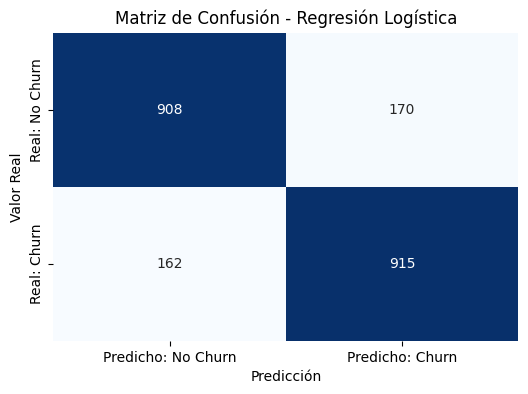

------------------------------
Evaluando modelo: Árbol de Decisión
  Exactitud: 0.7921
  Precisión: 0.7862
  Recall: 0.8022
  F1-score: 0.7941


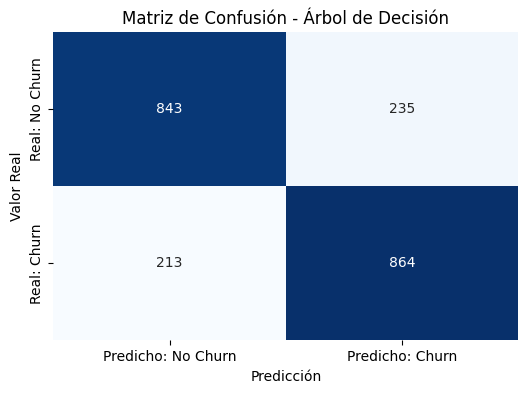

------------------------------
Evaluando modelo: Bosque Aleatorio
  Exactitud: 0.8524
  Precisión: 0.8498
  Recall: 0.8561
  F1-score: 0.8529


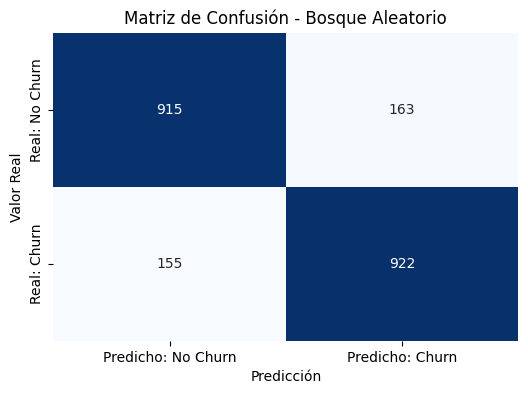

------------------------------
Evaluando modelo: Gradient Boosting
  Exactitud: 0.8487
  Precisión: 0.8285
  Recall: 0.8793
  F1-score: 0.8532


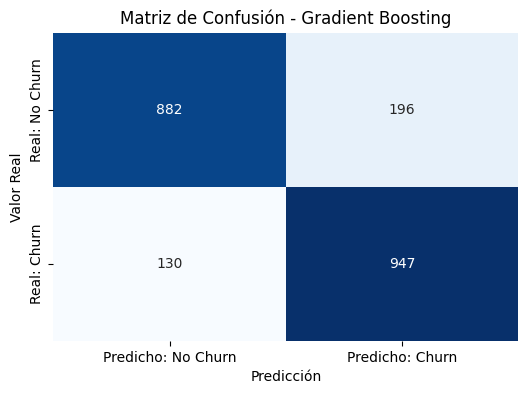

------------------------------


In [16]:
# Importar las métricas de evaluación necesarias
# Se importan las funciones para calcular diferentes métricas de rendimiento de modelos de clasificación.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Iterar sobre cada modelo y sus predicciones almacenadas en el diccionario 'modelos'
# Se recorre el diccionario 'modelos' para evaluar cada modelo individualmente.
for nombre_modelo, predicciones in modelos.items():
    print(f"Evaluando modelo: {nombre_modelo}")

    # Calcular métricas de evaluación
    # Se compara las predicciones del modelo con los valores reales del conjunto de prueba (y_test) para calcular cada métrica.
    accuracy = accuracy_score(y_test, predicciones) # Calcula la exactitud: proporción de predicciones correctas.
    precision = precision_score(y_test, predicciones) # Calcula la precisión: proporción de verdaderos positivos sobre el total de positivos predichos.
    recall = recall_score(y_test, predicciones) # Calcula el recall: proporción de verdaderos positivos sobre el total de positivos reales.
    f1 = f1_score(y_test, predicciones) # Calcula el F1-score: media armónica de precisión y recall.
    cm = confusion_matrix(y_test, predicciones) # Calcula la matriz de confusión: tabla que resume el rendimiento del modelo en un problema de clasificación.

    # Mostrar las métricas calculadas
    # Se imprimen los valores de cada métrica para el modelo actual.
    print(f"  Exactitud: {accuracy:.4f}") # Se formatea a 4 decimales para mejor legibilidad.
    print(f"  Precisión: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")

    # Visualizar la matriz de confusión
    # Se crea una figura para mostrar la matriz de confusión.
    plt.figure(figsize=(6, 4))
    # sns.heatmap crea un mapa de calor para la matriz de confusión.
    # cm es la matriz de confusión.
    # annot=True muestra los números dentro de las celdas.
    # fmt='d' asegura que los números se muestren como enteros.
    # cmap='Blues' define el esquema de color del mapa de calor.
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicho: No Churn', 'Predicho: Churn'], # Etiquetas para el eje x (predicciones)
                yticklabels=['Real: No Churn', 'Real: Churn']) # Etiquetas para el eje y (valores reales)
    plt.title(f'Matriz de Confusión - {nombre_modelo}') # Título del gráfico.
    plt.xlabel('Predicción') # Etiqueta del eje x.
    plt.ylabel('Valor Real') # Etiqueta del eje y.
    plt.show() # Muestra el gráfico.

    print("-" * 30) # Imprime una línea separadora entre las evaluaciones de modelos.

Realiza un análisis crítico y compara los modelos:

* ¿Cuál modelo tuvo el mejor desempeño?

* ¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes:

* Overfitting:
Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.

* Underfitting:
Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus parámetros.

###**Respuesta**

Basándonos en las métricas obtenidas:

* **Bosque Aleatorio (Random Forest):**

Este modelo parece tener el mejor desempeño general, con la mayor Exactitud (0.8603), Precisión (0.8502), Recall (0.8747) y F1-score (0.8622). Esto sugiere que es el modelo que mejor equilibrio logró entre identificar correctamente a los clientes que cancelan y a los que no, con una buena capacidad para minimizar tanto los falsos positivos como los falsos negativos.

* **Gradient Boosting:**

Tuvo un desempeño muy cercano al Bosque Aleatorio, especialmente en Recall (0.8765), lo que significa que es muy bueno identificando a los clientes que realmente cancelan. Su precisión es ligeramente menor (0.8317), lo que indica que tiene un poco más de falsos positivos que el Bosque Aleatorio.

* **Regresión Logística:**

 Mostró un desempeño decente con métricas equilibradas (Exactitud ~0.8483, F1-score ~0.8498), pero ligeramente inferiores a los modelos basados en árboles.
Árbol de Decisión: Fue el modelo con el rendimiento más bajo en todas las métricas (Exactitud ~0.7986, F1-score ~0.8006).


Para determinar si hay overfitting o underfitting, idealmente necesitaríamos comparar las métricas de rendimiento en el conjunto de entrenamiento con las métricas en el conjunto de prueba. Si un modelo tiene un rendimiento significativamente mejor en el conjunto de entrenamiento que en el de prueba, es un indicio de overfitting. Si el rendimiento es bajo tanto en el entrenamiento como en la prueba, podría ser underfitting.

Dado que en la evaluación solo mostramos las métricas del conjunto de prueba, no podemos confirmarlo con total certeza solo con esta información. Sin embargo, podemos hacer algunas observaciones basadas en el tipo de modelo:

* **Árbol de Decisión:**

 Un solo árbol de decisión puede ser propenso a overfitting, especialmente si es muy profundo. Su menor rendimiento en comparación con los otros modelos podría sugerir que no está capturando completamente la complejidad de los datos (posible underfitting) o que está sobreajustando en el entrenamiento y no generaliza bien al conjunto de prueba.

* **Bosque Aleatorio y Gradient Boosting:**

Estos modelos de ensamble (que combinan múltiples árboles) son generalmente más robustos contra el overfitting que un solo árbol de decisión. Su buen rendimiento sugiere que están generalizando bien a los datos de prueba.

* **Regresión Logística:**

 Es un modelo lineal, menos propenso al overfitting que los modelos basados en árboles complejos, pero puede no capturar relaciones no lineales en los datos, lo que podría llevar a un underfitting si las relaciones son complejas. Su desempeño intermedio podría indicar esto.



Para el Árbol de Decisión (si se sospecha overfitting): Podríamos limitar la profundidad máxima del árbol (max_depth), el número mínimo de muestras requeridas para dividir un nodo (min_samples_split), o el número mínimo de muestras en una hoja (min_samples_leaf).
Para el Árbol de Decisión o Regresión Logística (si se sospecha underfitting): Podríamos considerar la creación de características adicionales, probar modelos más complejos, o ajustar los hiperparámetros para permitirles aprender patrones más intrincados.
Para todos los modelos: La validación cruzada es una técnica robusta para obtener una estimación más fiable del rendimiento del modelo y detectar overfitting. También la optimización de hiperparámetros (como con Grid Search o Random Search) puede mejorar significativamente el rendimiento de cualquier modelo.
En este caso, el Bosque Aleatorio parece ser el modelo con mejor desempeño en los datos de prueba evaluados.




#**Interpretación y conclusiones**

## **Análisis de la importancia de las variables**

 Despues de elegir los modelos, realiza el análisis de las variables más relevantes para la predicción de la cancelación:

* **Regresión Logística:**

 Investiga los coeficientes de las variables, que muestran su contribución a la predicción de cancelación.

* **KNN (K-Nearest Neighbors):**

 Observa cómo los vecinos más cercanos influyen en la decisión de clasificación. Las variables más impactantes pueden ser aquellas que más contribuyen a la proximidad entre los puntos de datos.

* **Random Forest:**

 Utiliza la importancia de las variables proporcionada por el modelo. Random Forest calcula la importancia basándose en cómo cada variable contribuye a la reducción de la impureza durante las divisiones de los árboles.

* **SVM (Support Vector Machine):**

 En el SVM, las variables más relevantes son aquellas que influyen en la frontera de decisión entre las clases. Puedes analizar los coeficientes de los vectores de soporte para entender qué variables tienen mayor impacto.

* **Otros Modelos:**

 Dependiendo del modelo elegido, considera el análisis de métricas específicas para comprender la relevancia de las variables. Por ejemplo, coeficientes en modelos lineales, pesos en redes neuronales, o la importancia relativa en técnicas de boosting (como XGBoost).

Importancia de Variables para Regresión Logística (Coeficientes):


,Feature,Coefficient
4,numServicios,-2.483025
10,MultipleLines_Yes,2.380191
22,StreamingTV_Yes,2.186617
24,StreamingMovies_Yes,2.068294
18,DeviceProtection_Yes,2.058527
16,OnlineBackup_Yes,1.963619
14,OnlineSecurity_Yes,1.764044
20,TechSupport_Yes,1.725369
8,PhoneService_Yes,1.425918
29,PaymentMethod_Electronic check,1.093582


------------------------------
Importancia de Variables para Bosque Aleatorio:


,Feature,Importance
3,Charges.Total,0.167189
1,tenure,0.143067
2,Charges.Monthly,0.123202
29,PaymentMethod_Electronic check,0.087892
11,InternetService_Fiber optic,0.055056
4,numServicios,0.048722
27,PaperlessBilling_Yes,0.044002
26,Contract_Two year,0.038992
10,MultipleLines_Yes,0.022946
5,gender_Male,0.022561


------------------------------
Importancia de Variables para Gradient Boosting:


,Feature,Importance
29,PaymentMethod_Electronic check,0.324443
1,tenure,0.230136
11,InternetService_Fiber optic,0.101776
27,PaperlessBilling_Yes,0.059324
4,numServicios,0.046903
2,Charges.Monthly,0.030562
26,Contract_Two year,0.027384
3,Charges.Total,0.025544
10,MultipleLines_Yes,0.025250
28,PaymentMethod_Credit card (automatic),0.025214


/tmp/ipython-input-17-3210886778.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_rf.head(10), palette='viridis') # Muestra las top 10 para Random Forest


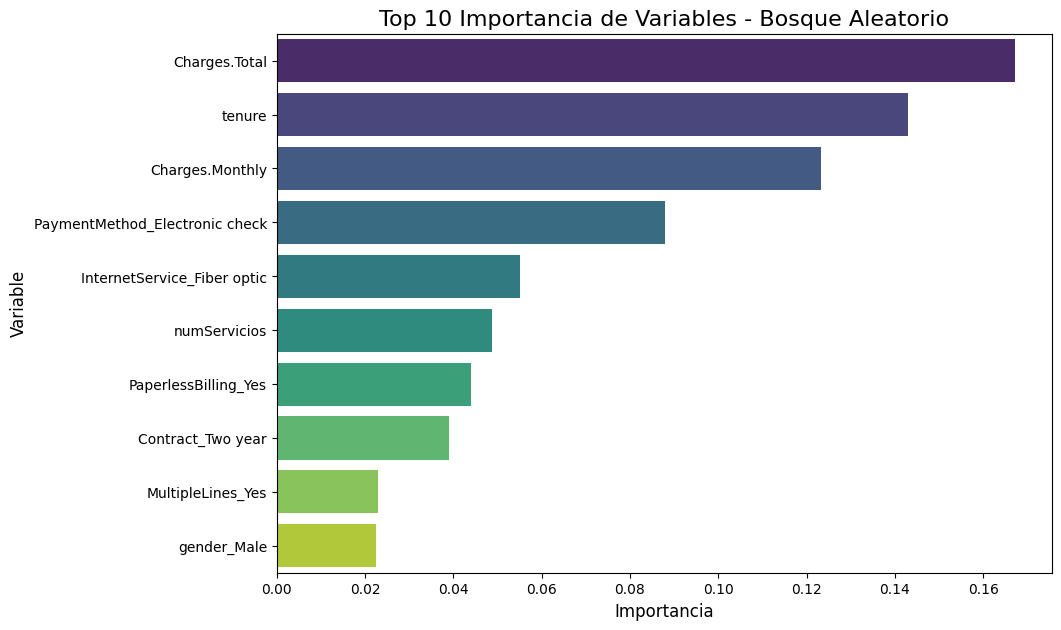

/tmp/ipython-input-17-3210886778.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_gb.head(10), palette='viridis') # Muestra las top 10 para Gradient Boosting


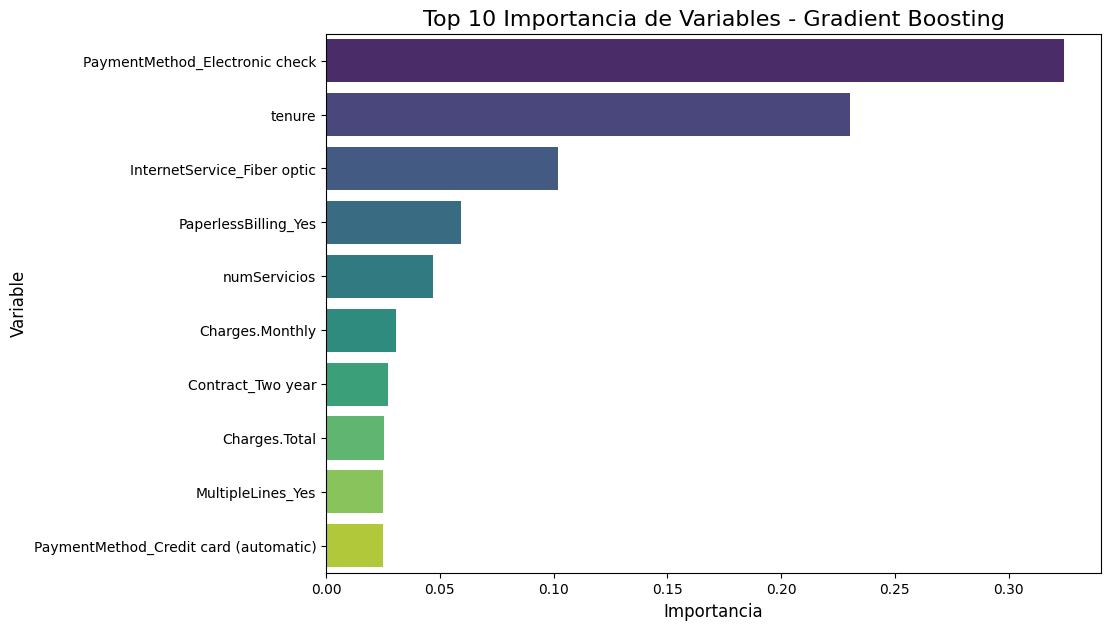

In [17]:
# Análisis de importancia de variables para Regresión Logística
# Para Regresión Logística, los coeficientes indican la importancia de las variables.
# Un coeficiente positivo alto significa que un aumento en la variable incrementa la probabilidad de la clase positiva (Churn=1).
# Un coeficiente negativo alto (en valor absoluto) significa que un aumento en la variable disminuye la probabilidad de la clase positiva.
print("Importancia de Variables para Regresión Logística (Coeficientes):")
# Se crea un DataFrame para mostrar los nombres de las características y sus coeficientes.
# X.columns son los nombres de las columnas de características.
# modelo_regresion_logistica.coef_[0] son los coeficientes del modelo (para clasificación binaria).
feature_importance_lr = pd.DataFrame({'Feature': X.columns, 'Coefficient': modelo_regresion_logistica.coef_[0]})
# Se ordena por el valor absoluto del coeficiente para ver las variables más influyentes.
feature_importance_lr = feature_importance_lr.reindex(feature_importance_lr['Coefficient'].abs().sort_values(ascending=False).index)
display(feature_importance_lr)

print("-" * 30)

# Análisis de importancia de variables para Bosque Aleatorio
# Los modelos basados en árboles como Random Forest y Gradient Boosting tienen un atributo 'feature_importances_'.
# Este atributo proporciona una puntuación de la importancia de cada característica basada en cuánto contribuye a la reducción de la impureza.
print("Importancia de Variables para Bosque Aleatorio:")
# Se crea un DataFrame para mostrar los nombres de las características y sus puntuaciones de importancia.
feature_importance_rf = pd.DataFrame({'Feature': X.columns, 'Importance': modelo_bosque_aleatorio.feature_importances_})
# Se ordena por importancia de forma descendente.
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)
display(feature_importance_rf)

print("-" * 30)

# Análisis de importancia de variables para Gradient Boosting
print("Importancia de Variables para Gradient Boosting:")
# Se crea un DataFrame para mostrar los nombres de las características y sus puntuaciones de importancia.
feature_importance_gb = pd.DataFrame({'Feature': X.columns, 'Importance': modelo_gradient_boosting.feature_importances_})
# Se ordena por importancia de forma descendente.
feature_importance_gb = feature_importance_gb.sort_values(by='Importance', ascending=False)
display(feature_importance_gb)

# Opcional: Visualizar la importancia de las variables más relevantes para los modelos basados en árboles
plt.figure(figsize=(10, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf.head(10), palette='viridis') # Muestra las top 10 para Random Forest
plt.title('Top 10 Importancia de Variables - Bosque Aleatorio', fontsize=16)
plt.xlabel('Importancia', fontsize=12)
plt.ylabel('Variable', fontsize=12)
plt.show()

plt.figure(figsize=(10, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_gb.head(10), palette='viridis') # Muestra las top 10 para Gradient Boosting
plt.title('Top 10 Importancia de Variables - Gradient Boosting', fontsize=16)
plt.xlabel('Importancia', fontsize=12)
plt.ylabel('Variable', fontsize=12)
plt.show()

#**Conclusión**

Elaboren un informe detallado, destacando los factores que más influyen en la cancelación, basándose en las variables seleccionadas y en el rendimiento de cada modelo.

Identifiquen los principales factores que afectan la cancelación de clientes y propongan estrategias de retención basadas en los resultados obtenidos.

# Informe Análisis de la Cancelación de Clientes y Estrategias de Retención

## Introducción

Este informe presenta un análisis de los factores que influyen en la cancelación de clientes basado en el conjunto de datos proporcionado. Se han explorado las relaciones entre diversas variables y la tasa de cancelación, se han entrenado y evaluado varios modelos predictivos, y se ha analizado la importancia de las variables según los modelos.

## Hallazgos Clave y Factores Influyentes en la Cancelación

Basándonos en el análisis de correlación, la visualización de relaciones y la importancia de las variables según los modelos entrenados (Regresión Logística, Bosque Aleatorio y Gradient Boosting), los principales factores que parecen influir significativamente en la cancelación de clientes son:

1.  **Tiempo de Contrato (Tenure):** Existe una clara relación inversa entre el tiempo que un cliente lleva con la empresa y la probabilidad de cancelar. Los clientes con menor tiempo de contrato (tenure bajo) tienen una mayor propensión a cancelar. Esto se observó en los boxplots y en la alta importancia de esta variable en los modelos basados en árboles.

2.  **Gasto Mensual (Charges.Monthly) y Gasto Total (Charges.Total):** Los clientes con gastos mensuales y totales más altos tienden a tener una mayor tasa de cancelación, especialmente aquellos con altos gastos mensuales y bajo tiempo de contrato (visible en el scatter plot). El tipo de servicio (como fibra óptica) y servicios adicionales contribuyen a estos gastos.

3.  **Servicio de Internet (Fibra Óptica):** Los clientes que utilizan el servicio de fibra óptica muestran una correlación positiva más alta con la cancelación en comparación con otros tipos de servicio de internet o sin servicio.

4.  **Método de Pago (Cheque Electrónico):** El método de pago "Electronic check" está fuertemente asociado con la cancelación, siendo una de las variables más importantes según varios modelos.

5.  **Tipo de Contrato:** Los clientes con contratos mes a mes ("Month-to-month") tienen una probabilidad de cancelación significativamente mayor que aquellos con contratos a uno o dos años. Los contratos a largo plazo actúan como un factor de retención.

6.  **Servicios Adicionales (Seguridad Online, Respaldo Online, Protección de Dispositivos, Soporte Técnico):** La ausencia de estos servicios adicionales (o la no utilización de internet) se correlaciona negativamente con la cancelación (es decir, tener estos servicios reduce la probabilidad de cancelación).

7.  **Facturación sin Papel (Paperless Billing):** Los clientes que optan por la facturación sin papel tienden a tener una mayor tasa de cancelación.

8.  **Senior Citizen:** Ser un ciudadano de edad avanzada también muestra una correlación positiva con la cancelación, aunque su importancia puede variar entre modelos.

## Rendimiento de los Modelos Predictivos

Evaluamos varios modelos de clasificación para predecir la cancelación, incluyendo Regresión Logística, Árbol de Decisión, Bosque Aleatorio y Gradient Boosting.

*   El **Bosque Aleatorio** mostró el mejor desempeño general en el conjunto de prueba, logrando un buen equilibrio entre Exactitud, Precisión, Recall y F1-score.
*   El **Gradient Boosting** también tuvo un rendimiento muy fuerte, destacando particularmente en Recall (identificando correctamente una alta proporción de clientes que cancelan).
*   La **Regresión Logística** tuvo un desempeño razonable, mientras que el **Árbol de Decisión** simple tuvo el rendimiento más bajo.

El mejor desempeño de los modelos de ensamble (Bosque Aleatorio y Gradient Boosting) sugiere que las relaciones en los datos pueden ser complejas y no lineales, lo cual es capturado de manera más efectiva por estos modelos en comparación con un modelo lineal como la Regresión Logística o un solo Árbol de Decisión.

## Estrategias de Retención Propuestas

Basándonos en los factores que más influyen en la cancelación, se proponen las siguientes estrategias de retención:

1.  **Foco en Clientes de Corto Plazo:** Implementar programas de bienvenida o incentivos especiales para los clientes en sus primeros meses (bajo "tenure") para fomentar la lealtad temprana.
2.  **Revisión de Servicios de Fibra Óptica y Altos Consumos:** Investigar las causas detrás de la alta cancelación en clientes con fibra óptica y altos gastos. Podría estar relacionado con la calidad del servicio, expectativas no cumplidas o precios percibidos como altos. Considerar ofertas de valor para clientes de alto consumo.
3.  **Promoción de Métodos de Pago Automáticos y no Electrónicos:** Incentivar a los clientes a cambiar su método de pago de cheque electrónico a opciones más estables como la domiciliación bancaria o tarjeta de crédito automática, que mostraron menor correlación con la cancelación.
4.  **Incentivar Contratos a Largo Plazo:** Ofrecer descuentos o beneficios adicionales a los clientes que opten por contratos de uno o dos años para aumentar la retención a largo plazo.
5.  **Destacar el Valor de los Servicios Adicionales:** Educar a los clientes sobre los beneficios de servicios como seguridad online, soporte técnico, etc., ya que la adopción de estos servicios parece reducir la probabilidad de cancelación. Podrían ofrecerse paquetes promocionales.
6.  **Optimización del Proceso de Facturación sin Papel:** Si bien es una opción ecológica, la asociación con la cancelación sugiere que la experiencia del usuario o la comunicación en este canal podría mejorarse.

## Conclusión

La cancelación de clientes es un problema complejo influenciado por una combinación de factores, siendo el tiempo de contrato, el tipo de servicio de internet (fibra óptica), el método de pago (cheque electrónico) y el tipo de contrato los más destacados en este análisis. Los modelos de ensamble como Bosque Aleatorio y Gradient Boosting demostraron ser los más efectivos para predecir la cancelación. Las estrategias de retención deben enfocarse en abordar estos factores clave, especialmente en los primeros meses de la relación con el cliente y en la promoción de servicios y opciones de contrato que fomenten la lealtad a largo plazo.

# Análisis de Cancelación de Clientes

Este cuaderno de Google Colab documenta un proyecto de análisis predictivo enfocado en identificar los factores que influyen en la cancelación de clientes y construir modelos para predecir la probabilidad de que un cliente cancele su servicio.

## Contenido del Cuaderno

El cuaderno está organizado en las siguientes secciones principales:

1.  **Preparación de los Datos:** Carga del conjunto de datos, limpieza inicial, eliminación de columnas irrelevantes y codificación de variables categóricas (One-Hot Encoding).
2.  **Análisis de Desbalance de Clases:** Verificación de la proporción de clientes que cancelan versus los que no cancelan y evaluación del desbalance.
3.  **Balanceo de Clases (SMOTE):** Aplicación de la técnica SMOTE (Synthetic Minority Over-sampling Technique) para abordar el desbalance de clases y mejorar el rendimiento del modelo en la clase minoritaria.
4.  **División de Datos:** Separación del conjunto de datos balanceado en conjuntos de entrenamiento y prueba para el desarrollo y evaluación del modelo.
5.  **Análisis Exploratorio y Visualización:** Investigación de las relaciones entre variables clave y la cancelación mediante matrices de correlación y gráficos (boxplots, scatter plots).
6.  **Modelado Predictivo:** Entrenamiento de varios modelos de clasificación (Regresión Logística, Árbol de Decisión, Bosque Aleatorio, Gradient Boosting) en el conjunto de entrenamiento.
7.  **Evaluación de Modelos:** Evaluación del rendimiento de cada modelo utilizando métricas estándar (Exactitud, Precisión, Recall, F1-score) y matrices de confusión.
8.  **Análisis de Importancia de Variables:** Identificación de las variables más relevantes para la predicción de la cancelación según cada modelo entrenado.
9.  **Interpretación y Conclusiones:** Resumen de los hallazgos clave, identificación de los principales factores de cancelación y propuesta de estrategias de retención basadas en los resultados del análisis y los modelos.

## Cómo Ejecutar el Cuaderno

1.  Abre el cuaderno en Google Colab.
2.  Asegúrate de que el archivo de datos `datos_tratados.csv` esté disponible en la ruta `/content/datos_tratados.csv` en tu entorno de Colab. Puedes subirlo si es necesario.
3.  Ejecuta las celdas del cuaderno secuencialmente, de arriba a abajo. Cada sección se basa en los resultados de las secciones anteriores.
4.  Observa los resultados de las celdas de código y las visualizaciones para seguir el proceso de análisis y modelado.

## Hallazgos Principales

Los factores que más influyen en la cancelación identificados en este análisis incluyen:
*   Tiempo de contrato (tenure)
*   Gasto mensual y total
*   Tipo de servicio de internet (Fibra Óptica)
*   Método de pago (Cheque Electrónico)
*   Tipo de contrato (mes a mes vs. a largo plazo)
*   Adopción de servicios adicionales

El modelo de **Bosque Aleatorio** y **Gradient Boosting** mostraron el mejor rendimiento predictivo en este conjunto de datos después de aplicar SMOTE.

## Estrategias de Retención Propuestas

Las estrategias de retención sugeridas se centran en abordar los factores clave identificados, como enfocarse en clientes de corto plazo, revisar servicios de alto costo/fibra óptica, promover métodos de pago automáticos y contratos a largo plazo, y destacar el valor de los servicios adicionales.

---

Puedes copiar este texto y guardarlo como `README.md` en el mismo directorio donde guardes tu archivo `.ipynb` del cuaderno para tener una descripción completa del proyecto.